In [1]:
# general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# data/model helpers
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

/Users/sam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('data/titanic.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.Age=df.Age.fillna(value=df.Age.mean())
df.Embarked=df.Embarked.fillna(value='Missing')
df.Embarked=df.Embarked.replace('C','Cherbourg').replace('Q','Queenstown').replace('S','Southampton')
df = df.drop('PassengerId', axis=1)
df = df.drop('Cabin', axis=1)
df = df.drop('Ticket', axis=1)
df = df.drop('Name', axis=1)
df = df.dropna()
y = df.Survived
X = df.drop('Survived',axis=1)

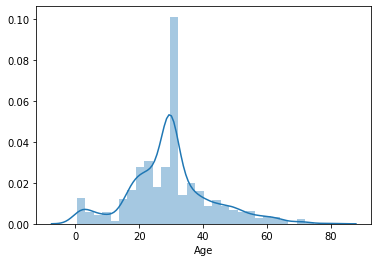

In [5]:
sns.distplot(X.Age)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

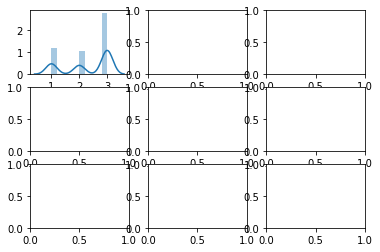

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3)
for i, column in enumerate(X.columns):
    sns.distplot(df[column],ax=axes[i//3,i%3])